In [1]:
import datetime, time
import numpy as np
import pandas as pd
from scipy import stats
import os
import subprocess

In [2]:

days = '10days'
#days = '90days'
#days = 'year'

sp = np.genfromtxt(os.path.join('./sims3', 'companies_final.csv'), delimiter=',', dtype=None)


In [3]:
tickers = sp[:,0]
industries = sp[:,1]

samples = tickers.size
states = []
for i in range(0,10):
    states.append(np.zeros(samples))

In [4]:

ticker_sub = tickers[:samples]
industry_sub = industries[:samples]

companies_sub = np.vstack((ticker_sub,industry_sub))

In [5]:
companies_sub[0,:]

array(['MMM', 'ABT', 'ACN', 'ATVI', 'AET', 'AMG', 'A', 'APD', 'AKAM',
       'ALK', 'ALB', 'AA', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG',
       'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP',
       'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV',
       'AAPL', 'AMAT', 'ADM', 'AJG', 'AIZ', 'T', 'ADSK', 'AN', 'AZO',
       'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BCR', 'BAX', 'BBT', 'BDX',
       'BBBY', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP',
       'BSX', 'BMY', 'BF-B', 'CHRW', 'CA', 'COG', 'CPB', 'COF', 'CAH',
       'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL',
       'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CB', 'CHD', 'CI', 'XEC',
       'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CME', 'CMS', 'COH', 'CTSH',
       'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW',
       'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA',
       'DE', 'DAL', 'XRAY', 'DVN', 'DO', 'DLR', 'DFS', 'DISCA', 'DLTR',
       

In [6]:
n=0
e=0
error_companies = []
final_companies = []
final_companies_ind = []
pd.options.display.float_format = '{:,.4f}'.format

for t,i in zip(companies_sub[0,:],companies_sub[1,:]):
    try:
        fname = t +"_"+ i + "_" + str(days) + "_kdes_adv.csv"
        dfrtmp = pd.read_csv(os.path.join('./sims3', fname))
        for s in range(0,9):
            states[s][n] = dfrtmp.at[s,'D']
        n=n+1
        final_companies.append(t)
        final_companies_ind.append(i)
    except:
        e = e+1
        #print (t,i)
        error_companies.append(t)
    
print (e)
print (n)
#ec = np.array((error_companies))
#fc1 = np.array((final_companies))
#fc2 = np.array((final_companies_ind))
#fc = np.vstack((fc1,fc2))
#fc=fc.T
#print fc
#for i in range(0,10):
#    states[i] = states[i][:n]
#np.savetxt('companies_final.csv',fc,delimiter=',',fmt="%s")

0
418


In [7]:
dfr = pd.DataFrame({  #"MLS", "Rand","Vtr","Psd","Lls","Mlns
                    '1 state' : states[0],
                    '3 states' : states[2],
                    '5 states' : states[4],
                    '7 states' : states[6],
                    '9 states' : states[8],
                    #'6 states' : states[5], 
                    #'7 states' : states[6],
                    #'8 states' : states[7],
                    #'9 states' : states[8], 
                     })

In [8]:
dfr.tail(3)

,1 state,3 states,5 states,7 states,9 states
415,0.1892,0.1616,0.2148,0.1592,0.1618
416,0.0583,0.0442,0.0426,0.0381,0.0326
417,0.1854,0.2041,0.2208,0.2340,0.2377


In [9]:
dfr.describe()[:3]

,1 state,3 states,5 states,7 states,9 states
count,418.0000,418.0000,418.0000,418.0000,418.0000
mean,0.1712,0.1694,0.1712,0.1709,0.1729
std,0.1352,0.1414,0.1398,0.1503,0.1372


In [10]:
d1 = dfr['1 state']
d2 = dfr['3 states']
d3 = dfr['5 states']
d4 = dfr['7 states']
d5 = dfr['9 states']


In [11]:
dfr_alone = pd.read_csv('stand_alone_10days_dfr.csv')

In [12]:
dfr_alone.describe()

,Unnamed: 0,1 state,3 states,5 states,7 states,9 states
count,418.0000,418.0000,418.0000,418.0000,418.0000,418.0000
mean,208.5000,0.1711,0.1768,0.1781,0.1794,0.1825
std,120.8105,0.1367,0.1648,0.1629,0.1630,0.1640
min,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000
25%,104.2500,0.0869,0.0815,0.0868,0.0832,0.0876
50%,208.5000,0.1453,0.1364,0.1443,0.1422,0.1441
75%,312.7500,0.2175,0.2232,0.2198,0.2268,0.2291
max,417.0000,1.5989,2.2190,2.1588,2.0581,2.0752


In [13]:
d1_alone = dfr_alone['1 state']
d2_alone = dfr_alone['3 states']
d3_alone = dfr_alone['5 states']
d4_alone = dfr_alone['7 states']
d5_alone = dfr_alone['9 states']

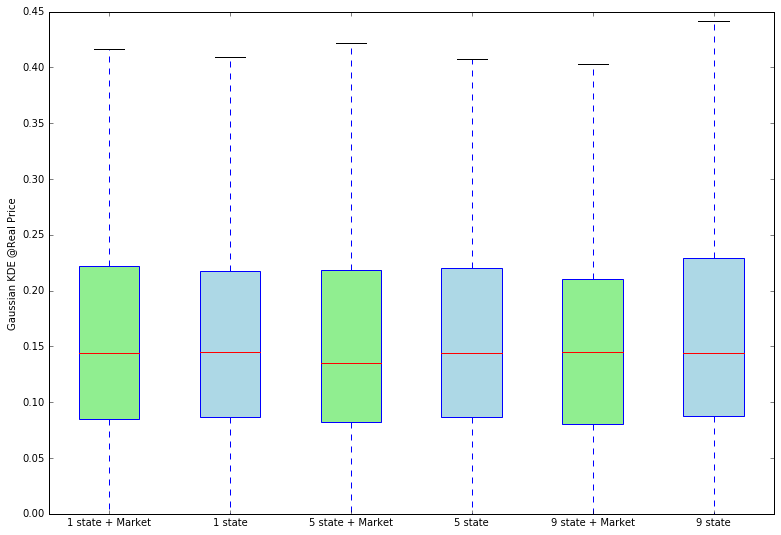

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

%matplotlib inline
plt.figure(figsize=(13, 9))
data = [d1,d1_alone,d3,d3_alone,d5,d5_alone]
#data = [d1_alone,d3_alone,d5_alone]
box = plt.boxplot(data, 0, '',widths=0.5, patch_artist=True);
plt.ylabel("Gaussian KDE @Real Price")
#plt.xticks([1,2,3], ['1 state', '5 state', '9 state']);
plt.xticks([1,2,3,4,5,6], ['1 state + Market', '1 state','5 state + Market', '5 state',
                         '9 state + Market', '9 state']);

colors = ['lightgreen', 'lightblue', 'lightgreen', 'lightblue', 'lightgreen', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.savefig('boxplot_state_number.png', bbox_inches='tight')

In [92]:
#z_stat, p_val = stats.ranksums(d1,d2)

In [93]:
#print (p_val)

In [94]:
p_val1 = stats.wilcoxon(d1,d1_alone, zero_method='wilcox', correction=False)[1]
p_val2 = stats.wilcoxon(d2,d2_alone, zero_method='wilcox', correction=False)[1]
p_val3 = stats.wilcoxon(d3,d3_alone, zero_method='wilcox', correction=False)[1]
p_val4 = stats.wilcoxon(d4,d4_alone, zero_method='wilcox', correction=False)[1]
p_val5 = stats.wilcoxon(d5,d5_alone, zero_method='wilcox', correction=False)[1]


In [95]:
print("P-value 1 ", p_val1) # Used because data is paired ! :D
print("P-value 2 ", p_val2)
print("P-value 3 ", p_val3)
print("P-value 4 ", p_val4)
print("P-value 5 ", p_val5)


('P-value 1 ', 0.41942458147718431)
('P-value 2 ', 0.12923536332835392)
('P-value 3 ', 0.35656639067304241)
('P-value 4 ', 0.0069967889096886494)
('P-value 5 ', 0.012126420002870982)


In [96]:
filename = "States_Table_Comparison_" + days + '_adv.tex'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(dfr.describe()[:3].to_latex()))

subprocess.call(['pdflatex', filename])

0

In [97]:
dfr_pvalues =  pd.DataFrame({       
                    '': pd.Categorical(["1 state vs."]),
                    '5 states':p_val1,
                    '9 states':p_val2,
                    
                     }, index=['p-value'])
#'D':np.array([0] * 2,dtype='int32'),

In [98]:
dfr_pvalues

,,5 states,9 states
p-value,1 state vs.,0.4194,0.1292


In [99]:
filename = "States_Pvalues_Comparison_" + days + '_adv.tex'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(dfr_pvalues.to_latex()))

subprocess.call(['pdflatex', filename])

0